# 通过 Cookie 进行 Web 爬虫抓取的介绍

在 Web 数据挖掘中，爬虫经常需要模拟浏览器进行数据抓取。许多网站为了避免恶意爬虫的攻击，通常会采用身份验证机制（如 Cookies、登录、验证码等）来确认访问者是否为真实用户。使用 Cookie 模拟用户身份是绕过这些机制的一种常见方法。


## 1. 什么是 Cookie？

Cookie 是服务器发送到用户浏览器并保存在本地的一小段数据，它可以用来标识用户身份、记录用户的登录状态、跟踪用户行为等。通过 Cookie，服务器可以识别来自同一用户的多次请求，帮助保持用户登录状态和个性化体验。

在爬虫抓取时，我们通常需要从浏览器获取到网站的 Cookie，然后在 HTTP 请求中携带这些 Cookie 来模拟浏览器行为，从而获取受限的数据。



## 2. 为什么要使用 Cookie？

1. **模拟用户登录**：
   - 某些网站需要用户登录后才能访问特定内容。通过 Cookie 模拟登录状态，可以避免重复登录。
   
2. **绕过反爬虫机制**：
   - 许多网站通过检查请求中的 Cookie 来识别是否是一个正常用户的请求。如果没有正确的 Cookie，网站可能会拒绝提供数据，或将请求识别为爬虫行为。

3. **维持会话状态**：
   - 有些网站会在 Cookie 中保存用户的会话信息，使用 Cookie 可以确保每次请求都处于同一个会话中，避免因会话过期导致数据抓取失败。



## 3. 如何获取 Cookie



### 3.1 使用浏览器获取 Cookie

你可以通过浏览器的开发者工具获取一个网站的 Cookie。以下是通过 Chrome 浏览器获取 Cookie 的步骤：

1. 打开 Chrome 浏览器并登录到目标网站（如知乎、微博等）。
2. 右键页面，选择 **检查** 或按 `F12` 打开开发者工具。
3. 在开发者工具中，切换到 **应用**（Application）标签。
4. 在左侧栏选择 **Cookies**，你会看到当前页面的 Cookie 信息。
5. 复制所有 Cookie 数据，或仅复制其中的某个重要字段（如 `PHPSESSID` 或 `ZHIHU_DANMU`）。


<center><strong style="color:red;">此图为登录知乎后查看的cookie信息</strong></center>

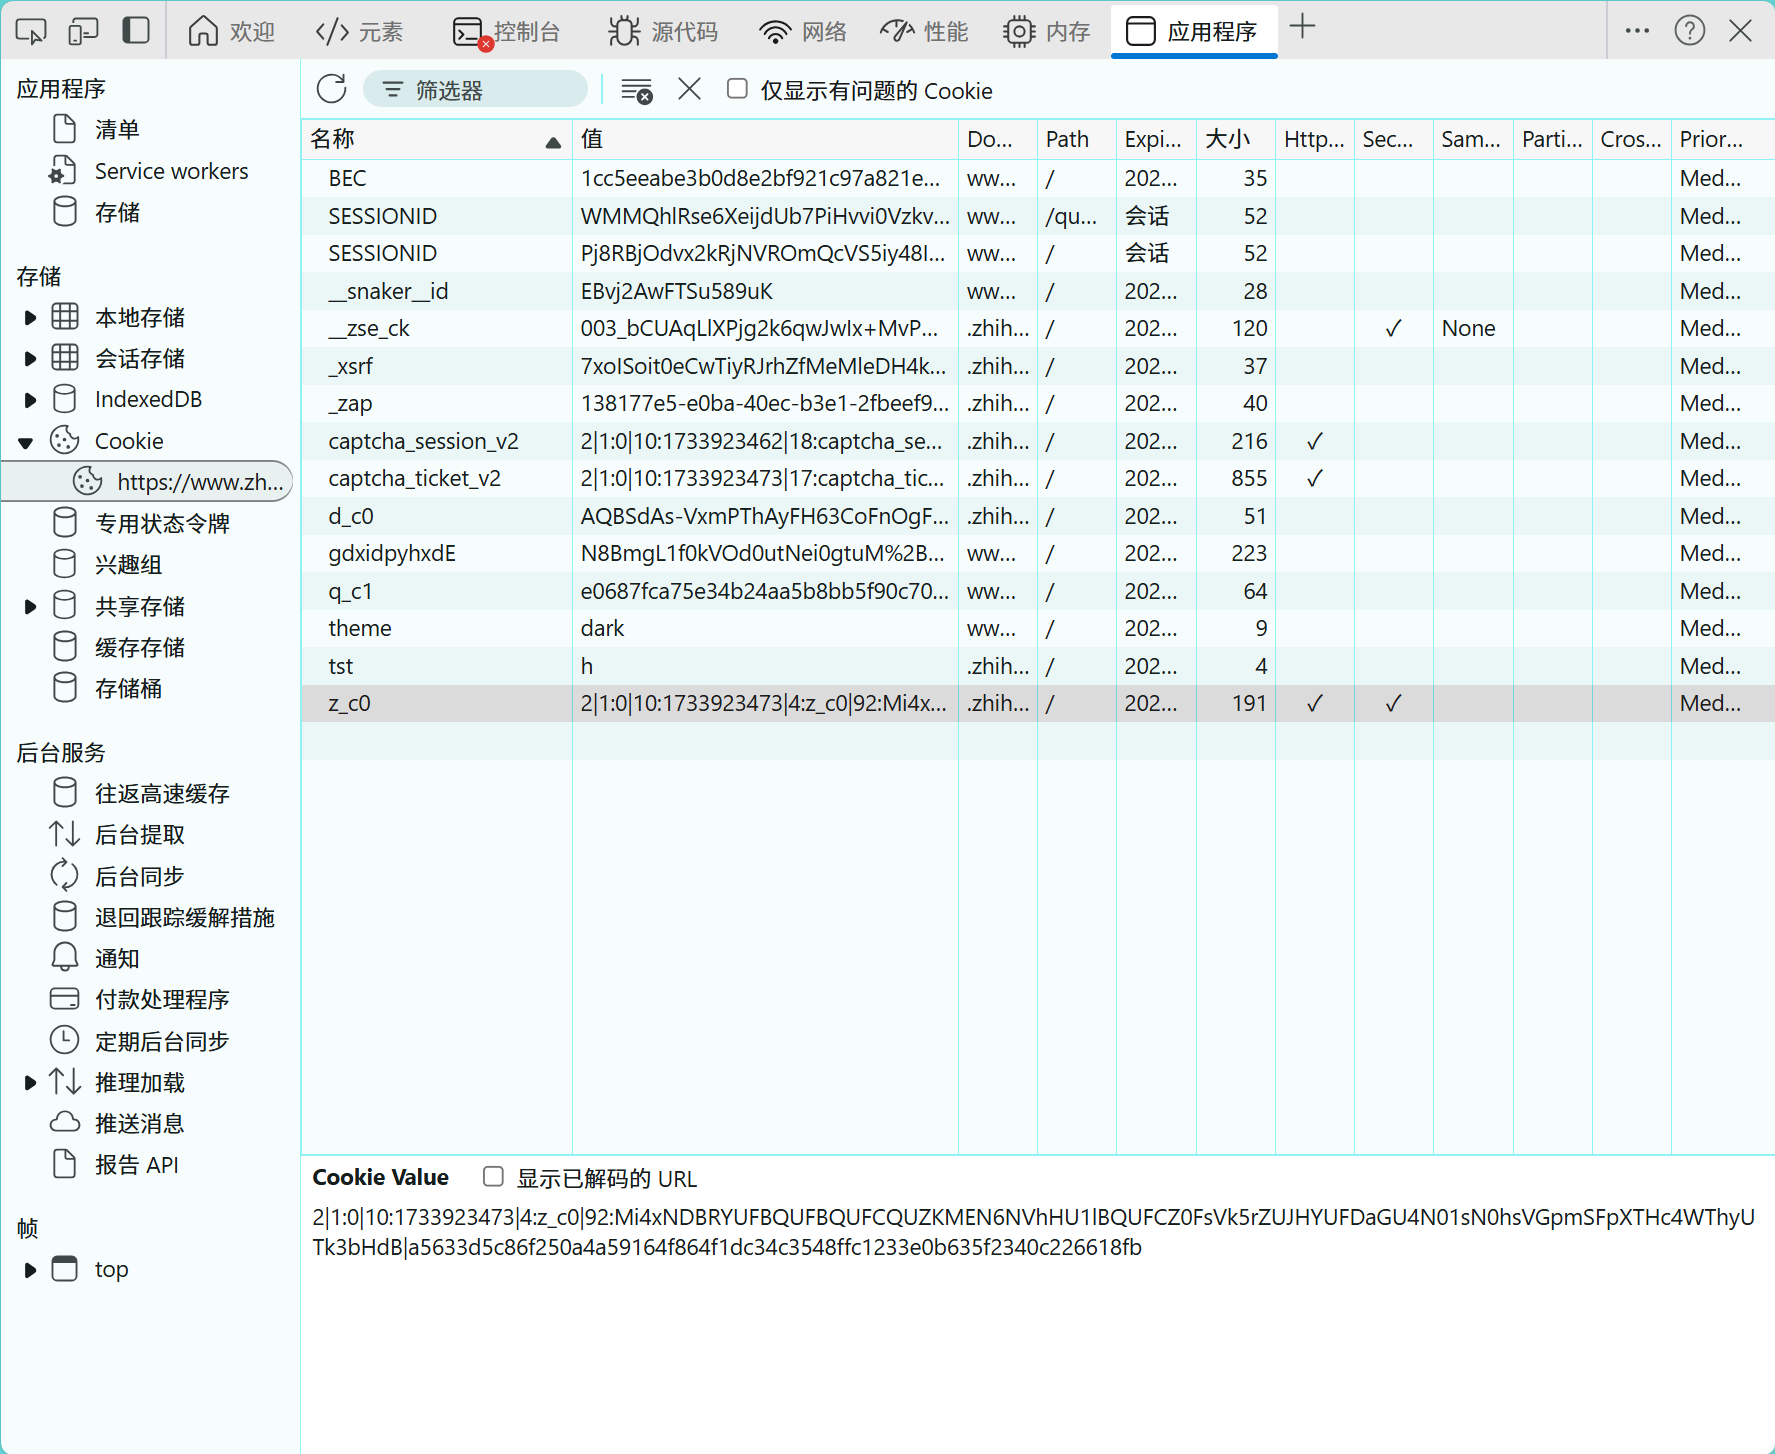

### 3.2 使用 Selenium 获取 Cookie

如果需要自动化地获取 Cookie，可以通过浏览器自动化工具（如 Selenium）来获取。以下是使用 Selenium 获取 Cookie 的例子：


In [1]:
from selenium import webdriver

# 启动浏览器并登录
driver = webdriver.Firefox()
driver.get("https://www.zhihu.com/hot")

# 等待网页加载并模拟登录

Exception managing firefox: error sending request for url (https://github.com/mozilla/geckodriver/releases/latest): connection error: unexpected end of file


In [2]:
# 在登录后获取所有 Cookie
cookies = driver.get_cookies()
cookies

[{'name': '_zap',
  'value': '90343947-c3be-425d-8c69-6a36b3ca12c9',
  'path': '/',
  'domain': '.zhihu.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1768495026,
  'sameSite': 'None'},
 {'name': '_xsrf',
  'value': '4e14076b-d266-48cc-9fe0-ed6fdb5e7635',
  'path': '/',
  'domain': '.zhihu.com',
  'secure': False,
  'httpOnly': False,
  'sameSite': 'None'},
 {'name': 'HMACCOUNT',
  'value': '958E68BDF4E6AE73',
  'path': '/',
  'domain': '.zhihu.com',
  'secure': False,
  'httpOnly': False,
  'sameSite': 'None'},
 {'name': 'd_c0',
  'value': 'ABAS8uG4rRmPTgZSaGYaT6BDwuZ5sVfAqgE=|1733935028',
  'path': '/',
  'domain': '.zhihu.com',
  'secure': False,
  'httpOnly': False,
  'expiry': 1768495029,
  'sameSite': 'None'},
 {'name': 'SESSIONID',
  'value': 'QYSq3XOVLxen6QTlVYLspnO8tR4WCW70OzbsK8V9NDY',
  'path': '/',
  'domain': 'www.zhihu.com',
  'secure': False,
  'httpOnly': False,
  'sameSite': 'None'},
 {'name': 'JOID',
  'value': 'V1wSAknSNYm8jK-9aNdjmb1qExZzgm_czrj28TiZTO_Uu

In [3]:
# 打印所有 Cookie
for cookie in cookies:
    print(cookie)

driver.quit() # 关闭浏览器

{'name': '_zap', 'value': '90343947-c3be-425d-8c69-6a36b3ca12c9', 'path': '/', 'domain': '.zhihu.com', 'secure': False, 'httpOnly': False, 'expiry': 1768495026, 'sameSite': 'None'}
{'name': '_xsrf', 'value': '4e14076b-d266-48cc-9fe0-ed6fdb5e7635', 'path': '/', 'domain': '.zhihu.com', 'secure': False, 'httpOnly': False, 'sameSite': 'None'}
{'name': 'HMACCOUNT', 'value': '958E68BDF4E6AE73', 'path': '/', 'domain': '.zhihu.com', 'secure': False, 'httpOnly': False, 'sameSite': 'None'}
{'name': 'd_c0', 'value': 'ABAS8uG4rRmPTgZSaGYaT6BDwuZ5sVfAqgE=|1733935028', 'path': '/', 'domain': '.zhihu.com', 'secure': False, 'httpOnly': False, 'expiry': 1768495029, 'sameSite': 'None'}
{'name': 'SESSIONID', 'value': 'QYSq3XOVLxen6QTlVYLspnO8tR4WCW70OzbsK8V9NDY', 'path': '/', 'domain': 'www.zhihu.com', 'secure': False, 'httpOnly': False, 'sameSite': 'None'}
{'name': 'JOID', 'value': 'V1wSAknSNYm8jK-9aNdjmb1qExZzgm_czrj28TiZTO_UufnoB2aP1d-KrbhtHeGNzChcScjHC-zuEVCw3Y7kw2E=', 'path': '/', 'domain': 'www.zhi

- cookie 是由名称、值、以及其他一些属性组成的。

## 4. 如何使用 Cookie 发送请求

在抓取网站数据时，发送 HTTP 请求时需要携带上获取到的 Cookie，以便模拟浏览器行为。使用 Python 的 `requests` 库时，可以通过 `cookies` 参数传递 Cookie。



### 4.1 方法1：使用 `requests` 发送带 Cookie 的请求（通过<strong style="color:red;">Selenium</strong>获取Cookie）


In [4]:
import requests

# 将Selenium的cookies转化为requests可以使用的格式
cookie_dict = {cookie['name']: cookie['value'] for cookie in cookies}

cookie_dict

{'_zap': '90343947-c3be-425d-8c69-6a36b3ca12c9',
 '_xsrf': '4e14076b-d266-48cc-9fe0-ed6fdb5e7635',
 'HMACCOUNT': '958E68BDF4E6AE73',
 'd_c0': 'ABAS8uG4rRmPTgZSaGYaT6BDwuZ5sVfAqgE=|1733935028',
 'SESSIONID': 'QYSq3XOVLxen6QTlVYLspnO8tR4WCW70OzbsK8V9NDY',
 'JOID': 'V1wSAknSNYm8jK-9aNdjmb1qExZzgm_czrj28TiZTO_UufnoB2aP1d-KrbhtHeGNzChcScjHC-zuEVCw3Y7kw2E=',
 'osd': 'V18SA03SNom9iK--aNZnmb5qEhJzgW_dyrj18TmdTOzUuP3oBGaO0d-JrblpHeKNzSxcSsjGD-ztEVG03Y3kwmU=',
 'captcha_session_v2': '2|1:0|10:1733935030|18:captcha_session_v2|88:bXV1NWFmUUZ2Vk5XckQ2VWdUMWYvaDdpOXNHdUtsN3dQU3liWWQ3bUk2VWphdnJ3SHZvMmk2U0RIU1IwUC8yTw==|87026ce41cf627d6f2db03d5d916ce4290433bbe2b3234b1d5abf48bdfe315ea',
 '__snaker__id': 'jnXFanafrf7yK0UT',
 'gdxidpyhxdE': '1GYwJg8zwci7vZ6E79yvZALvBW54ueR9TsnpW5sb6cZtKxH2xB9BWTN4fogHEbB0v%5CoMYAcZ6gJ%2Fq99fr12j0zT8Kh6kslRvv2a%2BdM8enOuG66xoq4ra2uvbiMf0MzBxeLKos892rrcbAiPVLY0CbWzRQBVPdKX6t8irC9WqeqcZXV7t%3A1733935935740',
 'z_c0': '2|1:0|10:1733935066|4:z_c0|92:Mi4xb3F0c0FnQUFBQUFBRUJMe

In [5]:
# 目标网址
url = 'https://www.zhihu.com/hot'

# 发送带 Cookie 的请求(requestes.get()方法传入cookies参数)

response = requests.get(url, cookies=cookie_dict) 

In [6]:
html  = response.text

html

'<!doctype html>\n<html lang="zh" data-hairline="true" class="itcauecng" data-theme="light"><head><meta charSet="utf-8"/><title data-rh="true">首页 - 知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="知乎，中文互联网高质量的问答社区和创作者聚集的原创内容平台，于 2011 年 1 月正式上线，以「让人们更好的分享知识、经验和见解，找到自己的解答」为品牌使命。知乎凭借认真、专业、友善的社区氛围、独特的产品机制以及结构化和易获得的优质内容，聚集了中文互联网科技、商业、影视、时尚、文化等领域最具创造力的人群，已成为综合性、全品类、在诸多领域具有关键影响力的知识分享社区和创作者聚集的原创内容平台，建立起了以社区驱动的内容变现商业模式。"/><link data-rh="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.81060cab.png"/><link data-rh="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-15

### 4.2 方法2：使用 `requests` 发送带 Cookie 的请求（通过<strong style="color:red;">浏览器开发者工具</strong>获取Cookie）

### 步骤：

1. **打开知乎热搜榜页面**：
   - 在浏览器中打开 [知乎热搜榜](https://www.zhihu.com/hot)。

2. **登录知乎**：
   - 使用你的知乎账户登录。

3. **打开开发者工具**：
   - 按 `F12` 或 `Ctrl + Shift + I` 打开开发者工具。
   - 切换到 **"Network"** 标签。

4. **刷新页面**：
   - 刷新页面以捕获网络请求。

5. **查找请求**：
   - 在左侧的请求列表中找到与知乎热搜榜相关的请求。通常，它会显示为 **GET** 请求，URL 为 `https://www.zhihu.com/hot` 或相关的 API 地址。
   
6. **查看请求头**：
   - 点击相关请求，切换到 **"Headers"** 标签。
   - 在 **Request Headers** 部分，你可以看到 `Cookie` 字段，包含了所有的 Cookie 信息。

7. **复制 Cookie**：
   - 复制 `Cookie` 字段中的完整内容，类似这样：
     ```
     _xsrf=your_xsrf_value; d_c0=your_d_c0_value; z_c0=your_z_c0_value;
     ```

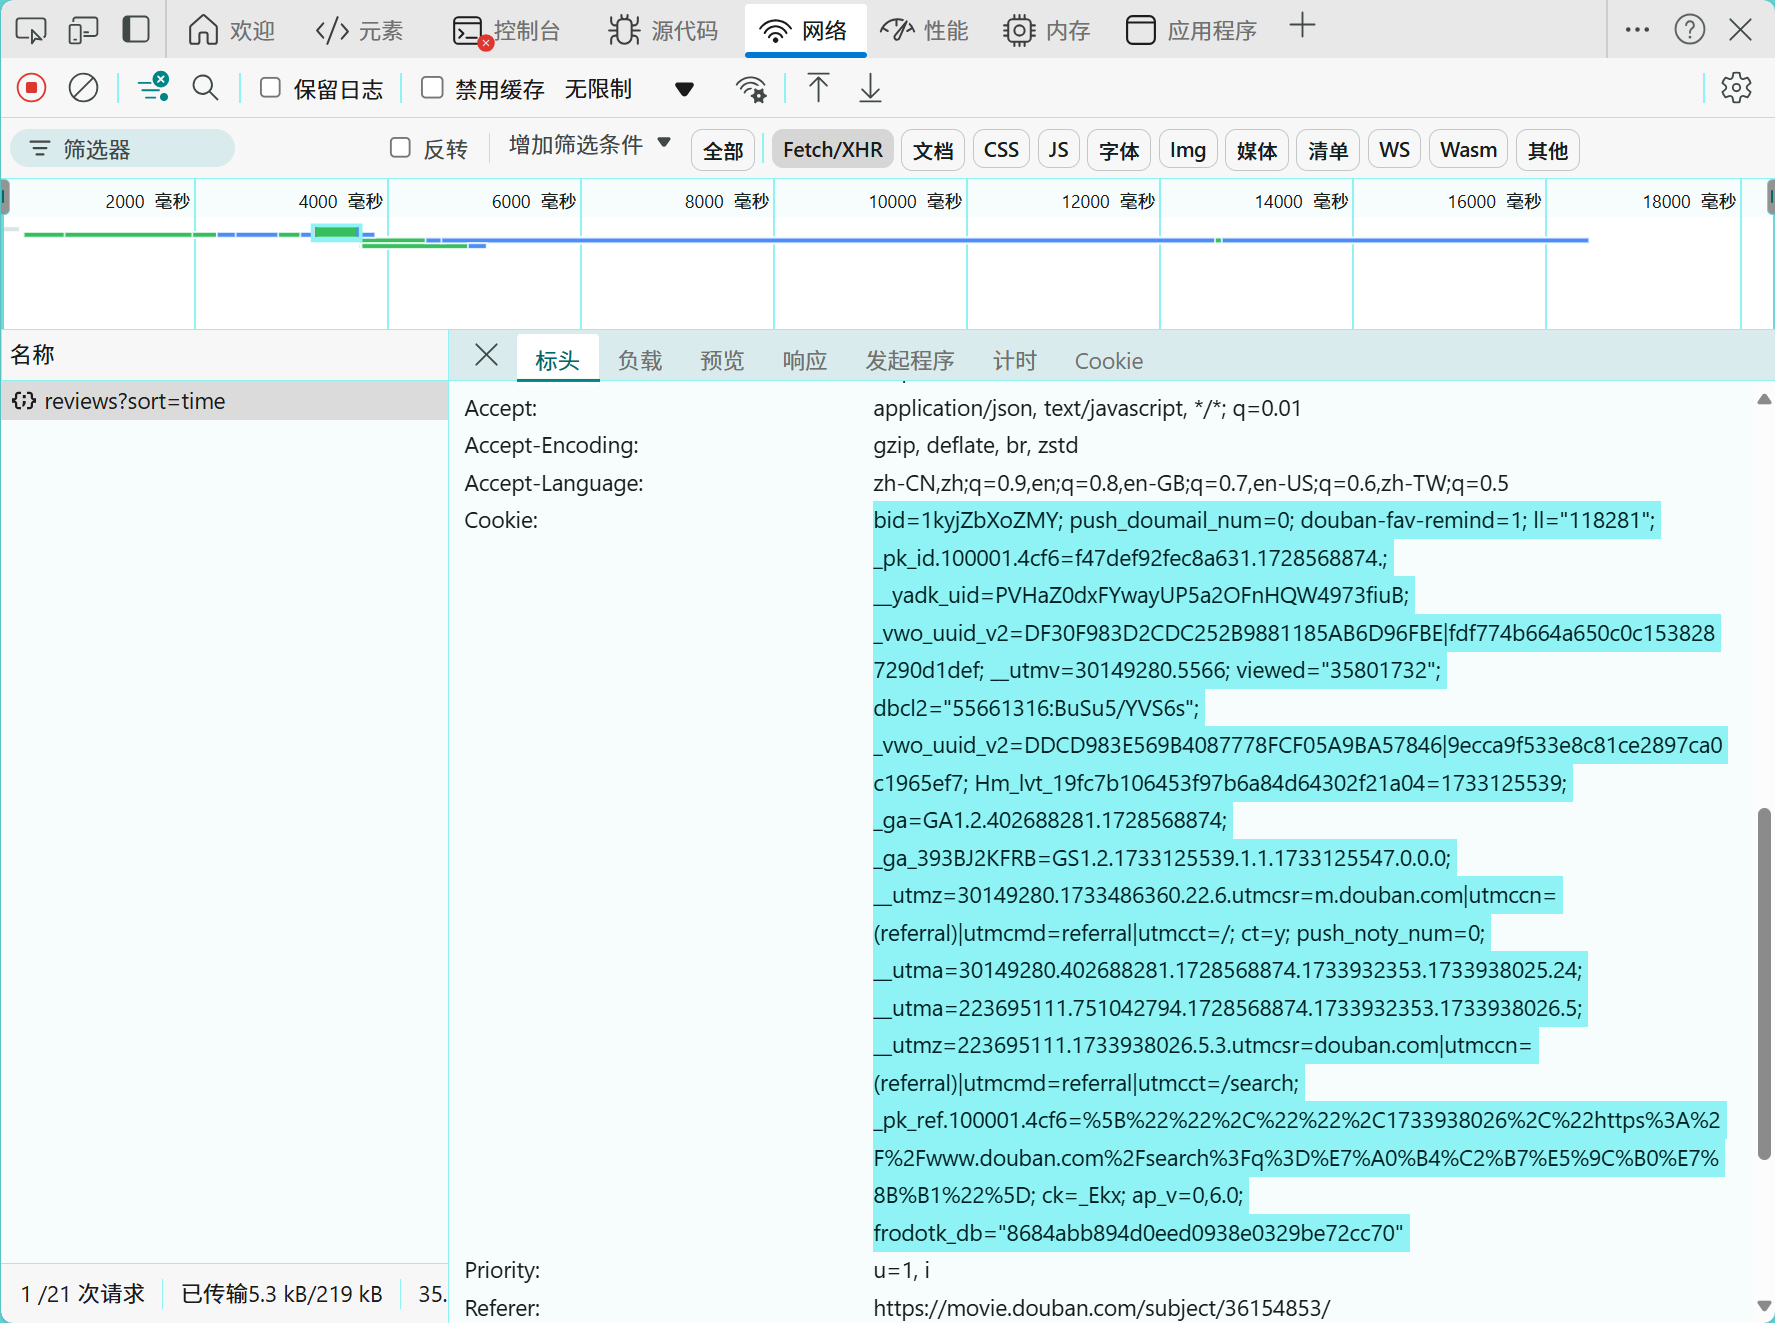

- **另外，User-Agent的信息也可以通过这样的方法获取，再下拉一下滑动条就可以看到。**

------------------------------ 

In [2]:
import requests
from pyquery import PyQuery as pq

In [3]:
# 你的知乎 Cookie（从浏览器开发者工具中获取）
cookies = {
'Cookie': 'SESSIONID=WMMQhlRse6XeijdUb7PiHvvi0VzkvmGdNwtxnBjIpdf; _xsrf=7xoISoit0eCwTiyRJrhZfMeMleDH4k0Y; _zap=138177e5-e0ba-40ec-b3e1-2fbeef90eb9d; d_c0=AQBSdAs-VxmPThAyFH63CoFnOgF1uOGjoHY=|1728131465; theme=dark; captcha_session_v2=2|1:0|10:1733923462|18:captcha_session_v2|88:YTVJdlY2MVhJZHdLSFBVSWdvanJuRHZoUGE4OHVOMS9wdDNGelh0NU1BdXhyNmNkZ1NrRllnVFAvNk5OOHIyNg==|9421366b0a8e03322a363e1702402bafdda0fdf64615bd8b3e43f4ddf129244d; __snaker__id=EBvj2AwFTSu589uK; gdxidpyhxdE=N8BmgL1f0kVOd0utNei0gtuM%2BZIryUJPS4vXmc5D4V%2FC7kzkUxLrpovLmCsnoD%2BUNE%2FN7h3OvcKAP8%5C%2BXRtRgflPBAolKKYPWOo%2B7C895eu6VXsVRs%2FPw0ZVC29k5tVRUac8j5VvyWVfbDfhXAtxUwUSIa%2Fsn%2FYcU0CAX4wX5QbIhdtA%3A1733924364151; captcha_ticket_v2=2|1:0|10:1733923473|17:captcha_ticket_v2|728:eyJ2YWxpZGF0ZSI6IkNOMzFfRkVBLkkwS2RnbDNuSm4qX0Z1T01icXJEaVF2ZUZOKlU2QzJKaEJXVXlWV3ZPYmowd0h0bjRJbW05UlFncC5LbTAuc2JLd3AwbUIxKk1yb1hqVlo2UHQ5bENKKmpaS25XdU5DaU9SZllybjhtVDN5ciphSmJaMG0zOVVTUFpLUkJ3aGlyMnBCc0dzTk8uTlVZUWRtVTNNcmhnZGgzZlhyalZuWW8ua2FrSjQqSHhySkNBcV9KRzlWQTNkS0tHNjBKUlpwTXlTdDBtSHhCSDFyUWpPOC54aFcqOHlpTllTVjBFc3NOSW1BNmF6SHVKcGJibm0xTEVyNXRlWmtZKkxZSF91VVlsWkI4UTVtX3EzQURBLnpOLjNlZF9KZEF2Z2szZ2xOVFpCeWdSVTBSSkM1YzRuaE1ndW9uUy5Rd2xTNkRZMWhFT2QuT0RxMTJHY3hFKkFhdEpkYWdFYzJGWFpNZU5Cc2ZpeE1sbDVoNW93R1lDNndURFVrMzRhTXR4TGZfRTZiaHBHbWtOWFBJS01YbV9LTDJLSWtGYTZpV0ZCZXouay5JMzM1NGNyblVCTUdoOWxsb3Z0UDYuZGNYWUp1Ni5PbWZkQWJUMldyT2g1eEswVDhmWlM1YUpFWDVEaFlGaHFzdFMybipXamlSaGpXV3JHRjFMR0ZnRm5YRHBIKjFOYmN1X2c3N192X2lfMSJ9|9fc1e3cf9cda9e359fb94f22cb51ec4bbbd326e85d3ba7de2bdbb2b84d6866d1; z_c0=2|1:0|10:1733923473|4:z_c0|92:Mi4xNDBRYUFBQUFBQUFCQUZKMEN6NVhHU1lBQUFCZ0FsVk5rZUJHYUFDaGU4N01sN0hsVGpmSFpXTHc4WThyUTk3bHdB|a5633d5c86f250a4a59164f864f1dc34c3548ffc1233e0b635f2340c226618fb; q_c1=e0687fca75e34b24aa5b8bb5f90c700a|1733923474000|1733923474000; tst=h; SESSIONID=Pj8RBjOdvx2kRjNVROmQcVS5iy48Iqf76VY4nEsx1I4; __zse_ck=003_bCUAqLlXPjg2k6qwJwIx+MvPRK5MWmuRx6dARAZFyMxuhdqYUeuGHl1GXuSRsBm3c7=jA7Pg7MLBvBQg3edK4WXvAtb7H2eS7PPQm+QsTRDt; BEC=69a31c4b51f80d1feefe6d6caeac6056'  # 替换为从浏览器获取的真实 Cookie
}   # 注意：Cookie内容有双引号，所以上面用了单引号
# 知乎热搜榜页面 URL
url = 'https://www.zhihu.com/hot'
# 发送请求，携带 Cookie 模拟登录
response = requests.get(url, cookies=cookies)

In [ ]:
# 另外也可将cookie放进headers请求头中

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
#     'Cookie': 'SESSIONID=WMMQhlRse6XeijdUb7PiHvvi0VzkvmGdNwtxnBjIpdf; _xsrf=7xoISoit0eCwTiyRJrhZfMeMleDH4k0Y; _zap=138177e5-e0ba-40ec-b3e1-2fbeef90eb9d; d_c0=AQBSdAs-VxmPThAyFH63CoFnOgF1uOGjoHY=|1728131465; theme=dark; captcha_session_v2=2|1:0|10:1733923462|18:captcha_session_v2|88:YTVJdlY2MVhJZHdLSFBVSWdvanJuRHZoUGE4OHVOMS9wdDNGelh0NU1BdXhyNmNkZ1NrRllnVFAvNk5OOHIyNg==|9421366b0a8e03322a363e1702402bafdda0fdf64615bd8b3e43f4ddf129244d; __snaker__id=EBvj2AwFTSu589uK; gdxidpyhxdE=N8BmgL1f0kVOd0utNei0gtuM%2BZIryUJPS4vXmc5D4V%2FC7kzkUxLrpovLmCsnoD%2BUNE%2FN7h3OvcKAP8%5C%2BXRtRgflPBAolKKYPWOo%2B7C895eu6VXsVRs%2FPw0ZVC29k5tVRUac8j5VvyWVfbDfhXAtxUwUSIa%2Fsn%2FYcU0CAX4wX5QbIhdtA%3A1733924364151; captcha_ticket_v2=2|1:0|10:1733923473|17:captcha_ticket_v2|728:eyJ2YWxpZGF0ZSI6IkNOMzFfRkVBLkkwS2RnbDNuSm4qX0Z1T01icXJEaVF2ZUZOKlU2QzJKaEJXVXlWV3ZPYmowd0h0bjRJbW05UlFncC5LbTAuc2JLd3AwbUIxKk1yb1hqVlo2UHQ5bENKKmpaS25XdU5DaU9SZllybjhtVDN5ciphSmJaMG0zOVVTUFpLUkJ3aGlyMnBCc0dzTk8uTlVZUWRtVTNNcmhnZGgzZlhyalZuWW8ua2FrSjQqSHhySkNBcV9KRzlWQTNkS0tHNjBKUlpwTXlTdDBtSHhCSDFyUWpPOC54aFcqOHlpTllTVjBFc3NOSW1BNmF6SHVKcGJibm0xTEVyNXRlWmtZKkxZSF91VVlsWkI4UTVtX3EzQURBLnpOLjNlZF9KZEF2Z2szZ2xOVFpCeWdSVTBSSkM1YzRuaE1ndW9uUy5Rd2xTNkRZMWhFT2QuT0RxMTJHY3hFKkFhdEpkYWdFYzJGWFpNZU5Cc2ZpeE1sbDVoNW93R1lDNndURFVrMzRhTXR4TGZfRTZiaHBHbWtOWFBJS01YbV9LTDJLSWtGYTZpV0ZCZXouay5JMzM1NGNyblVCTUdoOWxsb3Z0UDYuZGNYWUp1Ni5PbWZkQWJUMldyT2g1eEswVDhmWlM1YUpFWDVEaFlGaHFzdFMybipXamlSaGpXV3JHRjFMR0ZnRm5YRHBIKjFOYmN1X2c3N192X2lfMSJ9|9fc1e3cf9cda9e359fb94f22cb51ec4bbbd326e85d3ba7de2bdbb2b84d6866d1; z_c0=2|1:0|10:1733923473|4:z_c0|92:Mi4xNDBRYUFBQUFBQUFCQUZKMEN6NVhHU1lBQUFCZ0FsVk5rZUJHYUFDaGU4N01sN0hsVGpmSFpXTHc4WThyUTk3bHdB|a5633d5c86f250a4a59164f864f1dc34c3548ffc1233e0b635f2340c226618fb; q_c1=e0687fca75e34b24aa5b8bb5f90c700a|1733923474000|1733923474000; tst=h; SESSIONID=Pj8RBjOdvx2kRjNVROmQcVS5iy48Iqf76VY4nEsx1I4; __zse_ck=003_bCUAqLlXPjg2k6qwJwIx+MvPRK5MWmuRx6dARAZFyMxuhdqYUeuGHl1GXuSRsBm3c7=jA7Pg7MLBvBQg3edK4WXvAtb7H2eS7PPQm+QsTRDt; BEC=69a31c4b51f80d1feefe6d6caeac6056'
# }j

# url = 'https://www.zhihu.com/hot'

# response = requests.get(url, headers=headers)

In [4]:
html  = response.text

html

'<!doctype html>\n<html lang="zh" data-hairline="true" class="itcauecng" data-theme="dark"><head><meta charSet="utf-8"/><title data-rh="true">首页 - 知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="知乎，中文互联网高质量的问答社区和创作者聚集的原创内容平台，于 2011 年 1 月正式上线，以「让人们更好的分享知识、经验和见解，找到自己的解答」为品牌使命。知乎凭借认真、专业、友善的社区氛围、独特的产品机制以及结构化和易获得的优质内容，聚集了中文互联网科技、商业、影视、时尚、文化等领域最具创造力的人群，已成为综合性、全品类、在诸多领域具有关键影响力的知识分享社区和创作者聚集的原创内容平台，建立起了以社区驱动的内容变现商业模式。"/><link data-rh="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.81060cab.png"/><link data-rh="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152

------------------------------ 

- **把热搜榜的标题都打印出来**

In [13]:
doc = pq(html)

titles = doc('h2.HotItem-title')

for title in titles.items():
    print(title.text())

动画《秦时明月》怎么了，为什么断更这么久？官方是不做了吗？
美国众议院将投票表决「禁止大疆和道通两家中企在美国销售新无人机」，如何解读美方意图？
如果一个人快要饿死，一杯冰可乐和一个热乎的汉堡哪个更能救命？
如何看待谷歌推出的 Willow 量子芯片，号称解决了量子计算三十多年来的难题?
苏州一地实行「作业熔断机制」，让孩子到点停止作业及时就寝，对学生学习有什么影响？能否解决学业负担问题？
叙利亚过渡政府正式接管权力，未来局势能否「由乱向治」？「后阿萨德时代」的叙利亚政治转型前景如何？
网友爆料济南大学超市泡面涨到 10 元，挤走卖 3.5 元食堂大叔，如何看待这场风波？怎么解决比较好？
极越汽车发内部信称「合并重复部门、削减不赚钱项目，极越进入创业 2.0 阶段」，极越汽车出现什么问题？
国家卫健委数据显示，我国 90% 左右老年人居家养老，背后原因是什么？目前养老困境主要有哪些？
宋佳与张桂梅老师身形和外貌差距比较大，为什么宋佳饰演的张桂梅却给人感觉很还原、真实？
广电总局出手管理 AI「魔改」视频，相关视频以假乱真、为博流量亵渎经典，AI「魔改」的边界在哪？
为什么苹果手表会吸在高铁玻璃上？要怎么才能无损取下？
你有什么解压的小众爱好？
真我 Neo7 正式发布，首发价 2099 元，新机有哪些亮点值得关注？
OpenAI 正式开放 Canvas，支持 Python 编码，可整合到定制 GPT 中，有哪些亮点？
五个人可以打王者，四个人可以玩吃鸡，三个人可以斗地主，两个人可以谈恋爱，那么一个人可以干什么？
为什么组装电脑的人喜欢用大功率电源？
南京一女子花 70 万找中介为孩子申请上港大，入学一年后因材料造假被清退，中介需要承担哪些法律责任？
为什么晴雯和袭人不能一起给贾宝玉当姨娘？一定只能选一个？
大三女生决定不考研后已体验十几种工作，存款上万元，「不考研」会成为大学生的新常态、新趋势吗？
越对我好，我就越难过怎么办？我心理出问题了吗?
怎么让外星人明白左和右的概念？
每天吃半斤牛肉，连续吃一年体质会不会有变化？
银行年末密集发售大额存单，「2」字头存款利率再现，这波利率上调能延续多久？
韩国前国防部长官金龙显企图在狱中自杀，他为何会有如此举动？若被定罪他将面临什么？
为什么咖啡喝多了会让人心跳加快，但茶虽然含有咖啡因，却不会有同样的效果？
如何评价《博德之


## 5. 常见的 Cookie 处理问题

### 5.1 Cookie 过期

Cookie 可能会在一段时间后过期，导致请求失败。如果你发现获取数据时出错，可能是因为 Cookie 已过期。你需要重新获取 Cookie。

### 5.2 动态生成 Cookie

某些网站的 Cookie 是动态生成的，可能会受到时间、IP 或设备的影响。如果 Cookie 过期或无效，可能需要模拟登录过程或通过自动化工具（如 Selenium）获取新的 Cookie。

### 5.3 反爬虫机制

网站通常会设置防止爬虫的措施，如检测请求频率、检查请求头信息、验证 IP 地址等。如果频繁抓取网站数据，可能会被封禁。为了避免被识别为爬虫，建议：
- 设置请求头（如 `User-Agent`）模拟浏览器。
- 控制请求的频率，避免过度抓取。
- 使用代理 IP 来绕过 IP 限制。

## 6. 小结

通过使用 Cookie 模拟用户身份，可以有效绕过一些简单的反爬虫机制，并保持会话状态，进行数据抓取。了解如何获取、处理和使用 Cookie，是进行 Web 数据挖掘的基础技能之一。抓取过程中要注意遵循网站的使用条款，避免不当抓取导致的法律风险。

### 相关工具与技术：
- **Selenium**：自动化浏览器，获取动态内容。
- **requests**：用于发送 HTTP 请求，携带 Cookie 和请求头。
- **pyquery**：用于解析 HTML 内容，提取所需数据。
